In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
tickerSymbol = 'TATAPOWER.NS'
tickerData = yf.Ticker(tickerSymbol)

In [39]:
tickerDf = tickerData.history(period='1d', start='2010-1-1', end=None)

In [40]:
orignal_df=tickerDf.copy()

In [41]:
tickerDf.reset_index(inplace=True)

In [42]:
tickerDf['year'] = tickerDf['Date'].dt.year
tickerDf['month'] = tickerDf['Date'].dt.month
tickerDf['day'] = tickerDf['Date'].dt.day
tickerDf['hour'] = tickerDf['Date'].dt.hour

In [43]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [44]:
from datetime import datetime

In [45]:
tickerDf['formatted_date'] = tickerDf.apply(lambda row: convert_to_date(f"{row['year']} {row['month']} {row['day']} {row['hour']}"), axis=1)

In [46]:
tickerDf['Date'] = pd.to_datetime(tickerDf['Date']).dt.date

In [47]:
tickerDf.set_index('formatted_date',inplace=True)

<Axes: xlabel='formatted_date'>

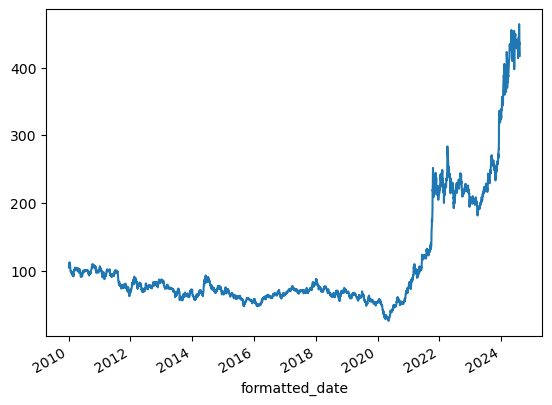

In [48]:
tickerDf['Close'].plot()

In [49]:
tickerDf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,hour
formatted_date,,,,,,,,,,,,
2010-01-04,2010-01-04,104.233369,105.282477,104.098010,104.489067,3172720,0.0,0.0,2010,1,4,0
2010-01-05,2010-01-05,104.985424,107.542371,104.756042,106.011963,4254349,0.0,0.0,2010,1,5,0
2010-01-06,2010-01-06,106.038265,112.505848,106.038265,110.930313,8747201,0.0,0.0,2010,1,6,0
2010-01-07,2010-01-07,111.302591,112.957084,108.670432,111.389076,5495560,0.0,0.0,2010,1,7,0
2010-01-08,2010-01-08,111.678614,112.280241,110.159479,111.328903,3916987,0.0,0.0,2010,1,8,0


In [50]:
from matplotlib import pyplot
result = seasonal_decompose(tickerDf['Close'], model='additive', period=1)

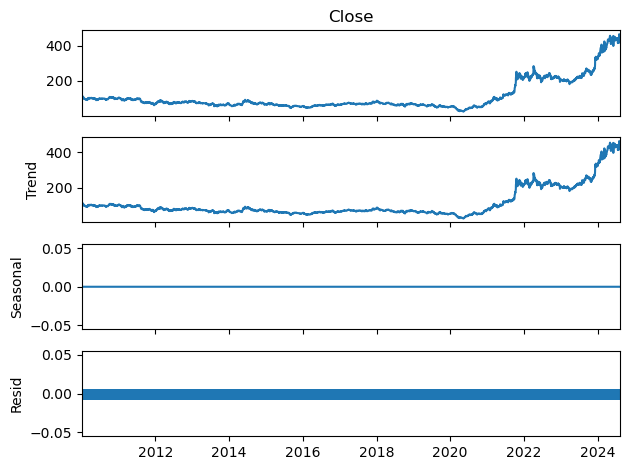

In [51]:
result.plot()
pyplot.show()

In this case, the seasonal component appears to be relatively flat, suggesting minimal seasonal fluctuations in the data.

we need to check Stationarity, if not, we need to convert and then we can apply Time Series.

In [52]:
from statsmodels.tsa.stattools import adfuller

In [53]:
result=adfuller(tickerDf['Close'])

In [54]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.566176
p-value: 0.999068
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


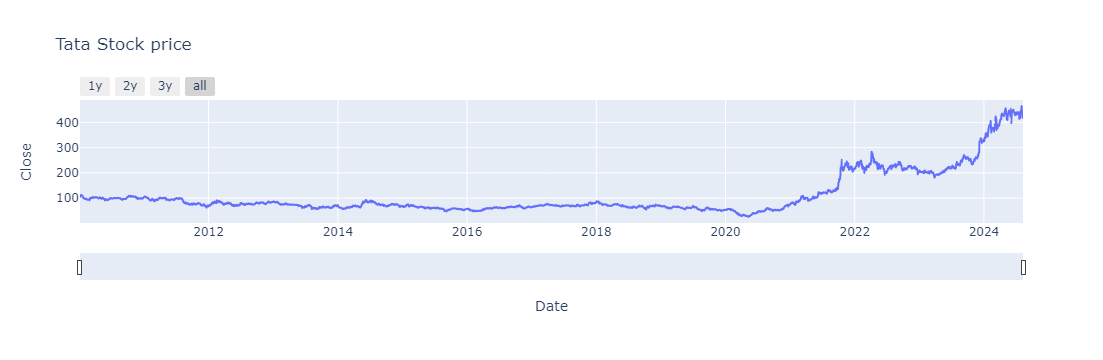

In [55]:
import plotly.express as px
fig = px.line(tickerDf, x='Date', y='Close', title='Tata Stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [56]:
tickerDf['Close_diff'] = tickerDf['Close'].diff().dropna()

Using the above code, we can convert the Non Stationarity to Stationarity.

There was just 1 null value at df.closs_diff, we can remove it or ignore it.

In [57]:
tickerDf.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
year            0
month           0
day             0
hour            0
Close_diff      1
dtype: int64

In [58]:
tickerDf.dropna(inplace=True)

In [59]:
tickerDf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,hour,Close_diff
formatted_date,,,,,,,,,,,,,
2010-01-05,2010-01-05,104.985424,107.542371,104.756042,106.011963,4254349,0.0,0.0,2010,1,5,0,1.522896
2010-01-06,2010-01-06,106.038265,112.505848,106.038265,110.930313,8747201,0.0,0.0,2010,1,6,0,4.918350
2010-01-07,2010-01-07,111.302591,112.957084,108.670432,111.389076,5495560,0.0,0.0,2010,1,7,0,0.458763
2010-01-08,2010-01-08,111.678614,112.280241,110.159479,111.328903,3916987,0.0,0.0,2010,1,8,0,-0.060173
2010-01-11,2010-01-11,111.686138,114.137799,110.264774,111.302597,4785645,0.0,0.0,2010,1,11,0,-0.026306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,446.000000,452.899994,430.100006,434.799988,28371364,0.0,0.0,2024,8,5,0,-25.550018
2024-08-06,2024-08-06,438.000000,449.399994,433.500000,436.700012,19245378,0.0,0.0,2024,8,6,0,1.900024
2024-08-07,2024-08-07,444.000000,445.299988,426.100006,430.299988,29078704,0.0,0.0,2024,8,7,0,-6.400024


In [60]:
result=adfuller(tickerDf['Close_diff'])

In [61]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.213693
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


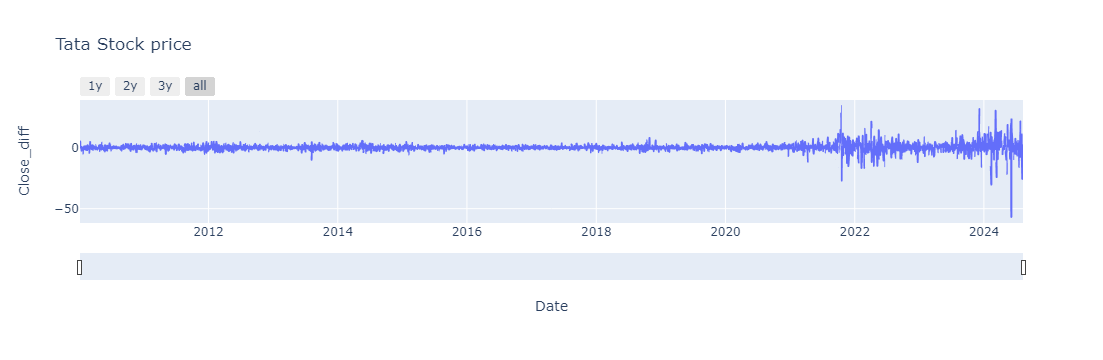

In [62]:
import plotly.express as px
fig = px.line(tickerDf, x='Date', y='Close_diff', title='Tata Stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

For finding a initial P,D,Q value, we can use ACF, PACF.

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [64]:
series_diff=tickerDf['Close_diff']

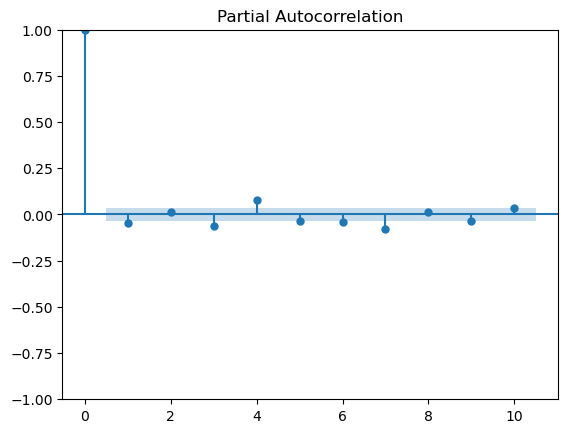

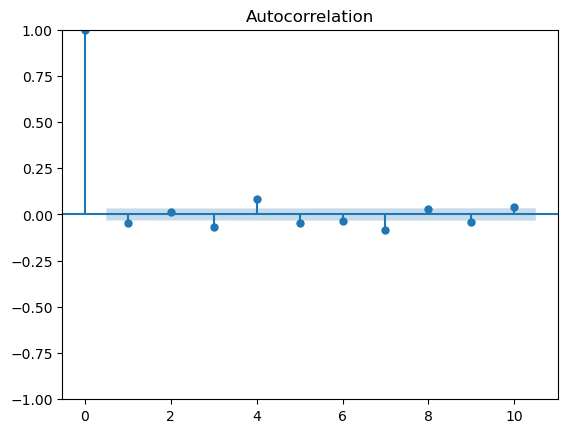

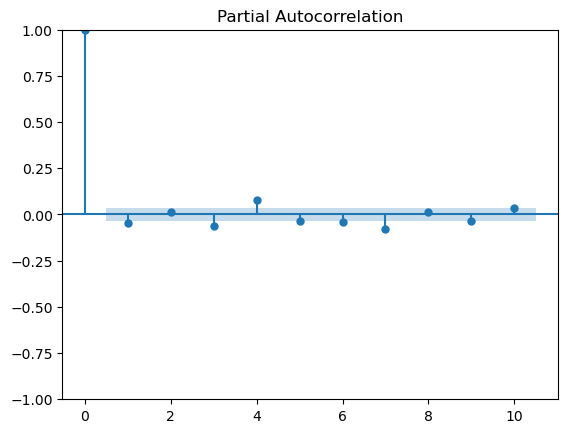

In [65]:
plot_acf(series_diff, lags=10)
plot_pacf(series_diff, lags=10)

Perform seasonal decomposition





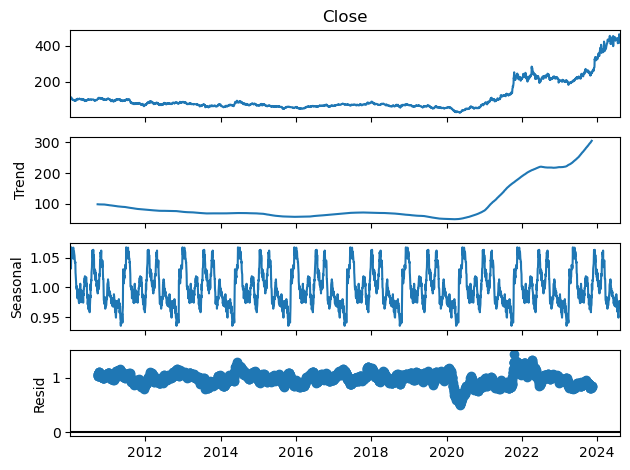






Time Series Decompositio





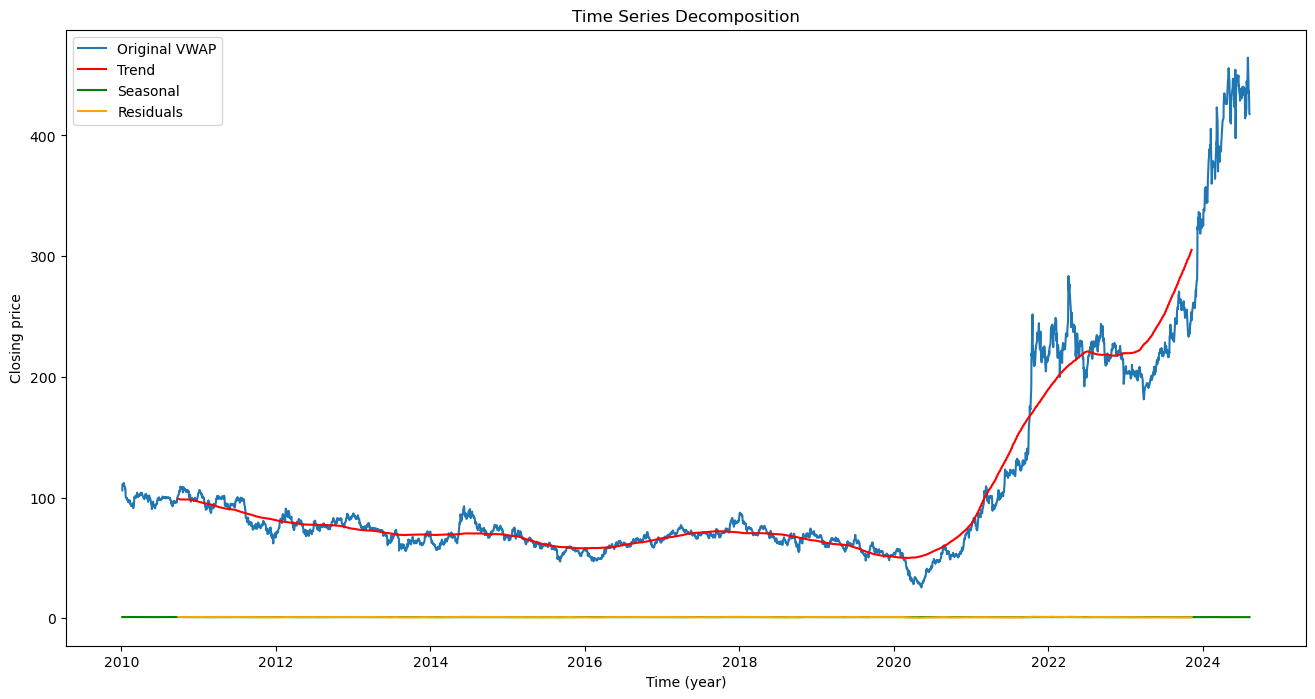

In [66]:
# Assuming df_vwap is your DataFrame with the VWAP data

# Perform seasonal decomposition

print('Perform seasonal decomposition')
print('\n\n')

result = seasonal_decompose(tickerDf['Close'], model='multiplicative',period=365)
# Assuming daily data with 252 trading days in a year
result.plot()
pyplot.show()

print('\n\n\n\n')

print('Time Series Decompositio')
print('\n\n')

# Plot the original time series data
plt.figure(figsize=(16, 8))
plt.plot(tickerDf['Close'], label='Original VWAP')

# Plot the trend component
plt.plot(result.trend, label='Trend', color='red')

# Plot the seasonal component
plt.plot(result.seasonal, label='Seasonal', color='green')

# Plot the re
plt.plot(result.resid, label='Residuals', color='orange')

plt.title('Time Series Decomposition')
plt.xlabel("Time (year)")
plt. ylabel ("Closing price")
plt.legend(loc='best')
plt.show()

<Axes: xlabel='year'>

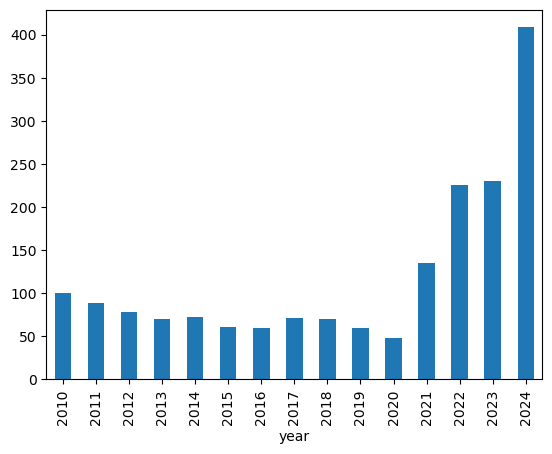

In [67]:
tickerDf.groupby('year')['Close'].mean().plot.bar()

<Axes: xlabel='month'>

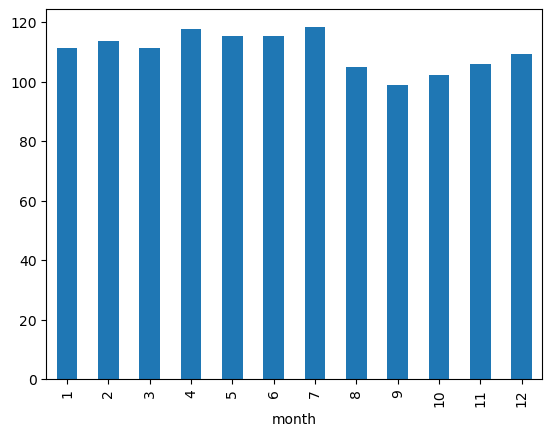

In [68]:
tickerDf.groupby('month')['Close'].mean().plot.bar()

In [69]:
orignal_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+05:30,104.233369,105.282477,104.098010,104.489067,3172720,0.0,0.0
2010-01-05 00:00:00+05:30,104.985424,107.542371,104.756042,106.011963,4254349,0.0,0.0
2010-01-06 00:00:00+05:30,106.038265,112.505848,106.038265,110.930313,8747201,0.0,0.0
2010-01-07 00:00:00+05:30,111.302591,112.957084,108.670432,111.389076,5495560,0.0,0.0
2010-01-08 00:00:00+05:30,111.678614,112.280241,110.159479,111.328903,3916987,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00+05:30,446.000000,452.899994,430.100006,434.799988,28371364,0.0,0.0
2024-08-06 00:00:00+05:30,438.000000,449.399994,433.500000,436.700012,19245378,0.0,0.0
2024-08-07 00:00:00+05:30,444.000000,445.299988,426.100006,430.299988,29078704,0.0,0.0


In [70]:
monthly_df = orignal_df.resample('M').mean()

In [71]:
monthly_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-31 00:00:00+05:30,106.516026,108.160032,104.490452,106.241133,4.737371e+06,0.000000,0.0
2010-02-28 00:00:00+05:30,95.674710,96.785560,94.049305,95.169850,4.567065e+06,0.000000,0.0
2010-03-31 00:00:00+05:30,101.015878,102.567058,99.874023,101.385453,4.819556e+06,0.000000,0.0
2010-04-30 00:00:00+05:30,101.654235,103.003966,100.471456,101.583356,3.112130e+06,0.000000,0.0
2010-05-31 00:00:00+05:30,97.615738,98.883470,96.053993,97.490756,3.477928e+06,0.000000,0.0
...,...,...,...,...,...,...,...
2024-04-30 00:00:00+05:30,423.326973,430.095630,419.942647,425.190845,1.683190e+07,0.000000,0.0
2024-05-31 00:00:00+05:30,436.132546,440.754005,428.726370,434.464084,1.409507e+07,0.000000,0.0
2024-06-30 00:00:00+05:30,440.763983,445.552334,430.566467,437.743758,1.525548e+07,0.000000,0.0


<Axes: xlabel='Date'>

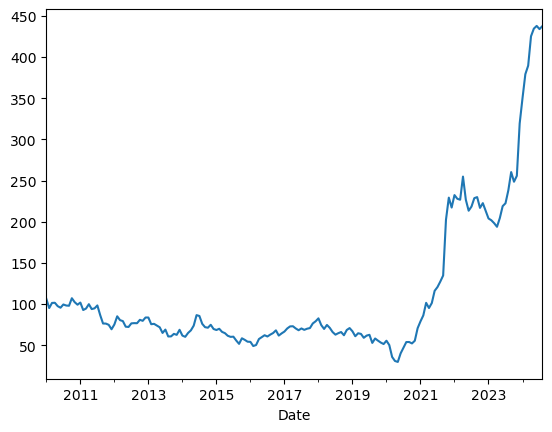

In [72]:
monthly_df['Close'].plot()

In [73]:
series=monthly_df['Close']

In [74]:
series

Date
2010-01-31 00:00:00+05:30    106.241133
2010-02-28 00:00:00+05:30     95.169850
2010-03-31 00:00:00+05:30    101.385453
2010-04-30 00:00:00+05:30    101.583356
2010-05-31 00:00:00+05:30     97.490756
                                ...    
2024-04-30 00:00:00+05:30    425.190845
2024-05-31 00:00:00+05:30    434.464084
2024-06-30 00:00:00+05:30    437.743758
2024-07-31 00:00:00+05:30    433.872636
2024-08-31 00:00:00+05:30    437.464286
Freq: M, Name: Close, Length: 176, dtype: float64



---



# Model Building

We are using 80% data for training and remained for Testing.

In [75]:
train_size=int(len(series)*0.80)

In [76]:
train_data,test_data=series[0:train_size],series[train_size:]

In [77]:
# print(train_data)
# print('-------------------')
# print(test_data)

In [78]:
start=len(train_data)

In [79]:
start

140

In [80]:
end=len(train_data)+len(test_data)-1

In [81]:
end

175

# ARIMA

In [82]:
from statsmodels.tsa.arima.model import ARIMA

(4,1,4) was my assumed, initial P,D,Q values, I get from ACF and PACF.

Then I Hypertune the ARIMA model and get the Best P,D,Q Value (5,2,1).

In [83]:
# model=ARIMA(train_data,order=(4,1,4))
model=ARIMA(train_data,order=(5,2,1))

In [84]:
model_fit=model.fit()

In [85]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  140
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -420.653
Date:                Sat, 10 Aug 2024   AIC                            855.306
Time:                        15:02:19   BIC                            875.797
Sample:                    01-31-2010   HQIC                           863.633
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2567      0.141     -1.820      0.069      -0.533       0.020
ar.L2         -0.4266      0.120     -3.547      0.000      -0.662      -0.191
ar.L3         -0.1325      0.134     -0.991      0.322      -0.395       0.130
ar.L4         -0.3102      0.091     -3.400      0.001      -0.489      -0.131
ar.L5         -0.2375      0.108     -2.202      0.028      -0.449      -0.026
ma.L1         -0.5676      0.132     -4.302      0.000      -0.826      -0.309
sigma2        25.6670      3.095      8.294      0.000      19.601      31.733
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.92   Prob(JB):                         0.90
Heteroskedasticity (H):               1.29   Skew:                            -0.03
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
model_pred=model_fit.predict(start=start,end=end+1,type='levels')

<Axes: xlabel='Date'>

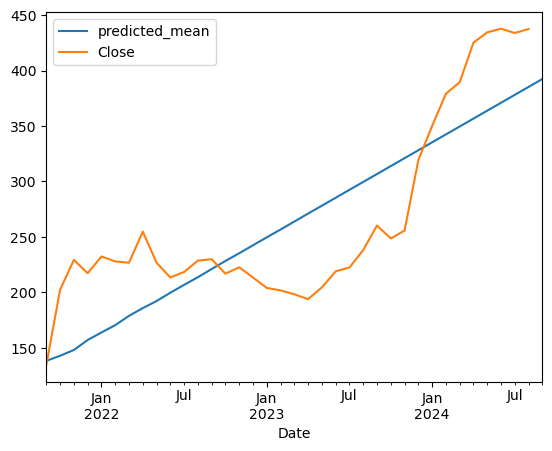

In [87]:
model_pred.plot(legend=True)
test_data.plot(legend=True)

# Forecasting the next 12 Months

In [88]:
forecast_period = 12  # Number of months to forecast
forecast_index = pd.date_range(start='2024-08-31 00:00:00+05:30', periods=forecast_period, freq='M')

# Get the forecast
forecast = model_fit.get_forecast(steps=forecast_period)

# Extract the predicted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_series = pd.Series(forecast_values)
forecast_series = pd.DataFrame(forecast_series)

print(forecast_series)


# print('---------------------')

# print(forecast_values)


# forecast_col = df_for['predicted_mean']

# print(forecast_col)

# print(forecast.predicted_mean.loc[])
# forecast_series = pd.Series(forecast_col, index=forecast_index)
# print(forecast_series)


                           predicted_mean
2021-09-30 00:00:00+05:30      138.196601
2021-10-31 00:00:00+05:30      142.796743
2021-11-30 00:00:00+05:30      148.034464
2021-12-31 00:00:00+05:30      157.008453
2022-01-31 00:00:00+05:30      163.784138
2022-02-28 00:00:00+05:30      170.392688
2022-03-31 00:00:00+05:30      178.776029
2022-04-30 00:00:00+05:30      185.756062
2022-05-31 00:00:00+05:30      192.155835
2022-06-30 00:00:00+05:30      199.641984
2022-07-31 00:00:00+05:30      206.771970
2022-08-31 00:00:00+05:30      213.620582


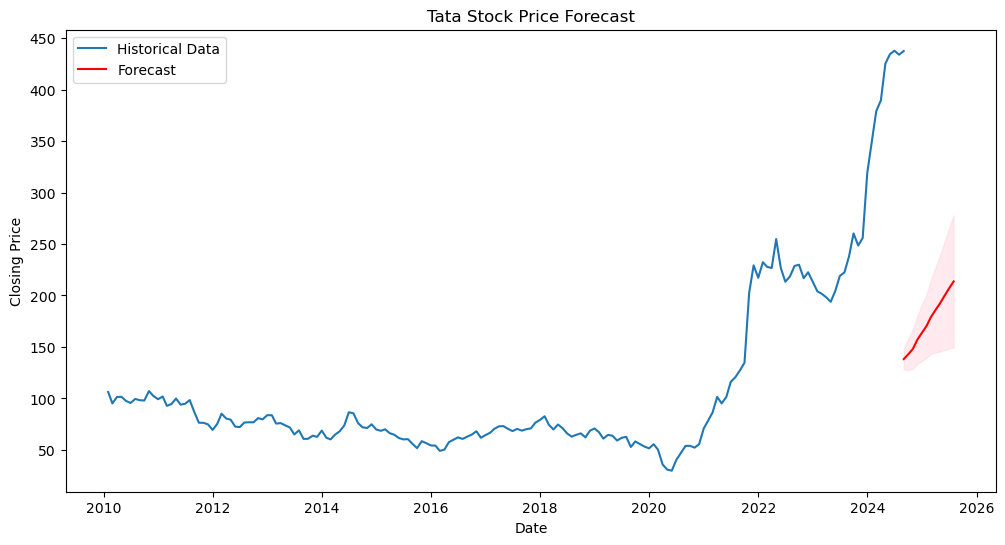

In [89]:
# Plot the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['Close'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Tata Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

I know, the prediction is not Accurate but I'm in my Learning Phase, and Try to improve using Auto ARIMA, and Advanced topic like LSTM, FB Prophet, Exponential smoothing.

In [90]:
# forecast_values

In [91]:
# forcast_steps=12

# forecast_index=pd.date_range(start='2024-08-31', periods=forcast_steps, freq='M')

# forecast=model_fit.get_forecast(steps=forcast_steps)

In [92]:
# forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [93]:
# forecast_series

In [94]:
daily_forecast = forecast_series.resample('D').interpolate(method='linear')

In [95]:
daily_forecast

,predicted_mean
2021-09-30 00:00:00+05:30,138.196601
2021-10-01 00:00:00+05:30,138.344993
2021-10-02 00:00:00+05:30,138.493385
2021-10-03 00:00:00+05:30,138.641776
2021-10-04 00:00:00+05:30,138.790168
...,...
2022-08-27 00:00:00+05:30,212.736890
2022-08-28 00:00:00+05:30,212.957813
2022-08-29 00:00:00+05:30,213.178736
2022-08-30 00:00:00+05:30,213.399659


                                Close  predicted_mean
2021-09-30 00:00:00+05:30  134.701253      138.196601
2021-10-01 00:00:00+05:30         NaN      138.344993
2021-10-02 00:00:00+05:30         NaN      138.493385
2021-10-03 00:00:00+05:30         NaN      138.641776
2021-10-04 00:00:00+05:30         NaN      138.790168
...                               ...             ...
2024-04-30 00:00:00+05:30  425.190845             NaN
2024-05-31 00:00:00+05:30  434.464084             NaN
2024-06-30 00:00:00+05:30  437.743758             NaN
2024-07-31 00:00:00+05:30  433.872636             NaN
2024-08-31 00:00:00+05:30  437.464286             NaN

[360 rows x 2 columns]





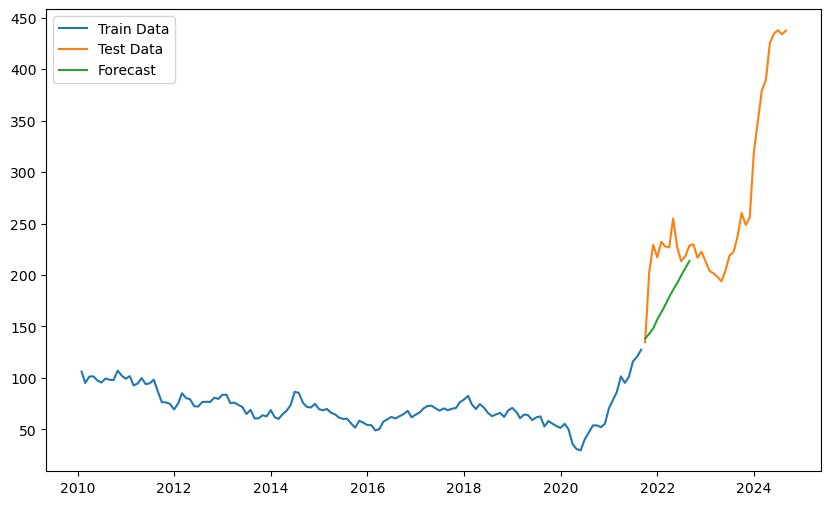




Root Mean Squared Error: 149.1837916302329


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Combine actual and forecast data
actual_and_forecast = pd.concat([test_data, daily_forecast], axis=1)

print(actual_and_forecast)
print('\n\n')

actual_and_forecast.columns = ['Actual', 'Forecast']

# Plot the actual and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data')
plt.plot(daily_forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate RMSE
rmse = mean_squared_error(test_data, daily_forecast[:len(test_data)], squared=False)
print('\n\n')
print(f'Root Mean Squared Error: {rmse}')


In [97]:
model_pred=model_fit.predict(start=start,end=end,type='levels')

In [98]:
len(model_pred)

36

In [99]:
len(test_data)

36

In [100]:
from sklearn.metrics import mean_absolute_error

In [101]:
mae=mean_absolute_error(model_pred,test_data)
print(mae)

46.96176991646482


# Hyperparameter Tuning For ARIMA Model

In [102]:
import itertools

# Define the range of p, d, and q values to try
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# Generate all possible combinations of p, d, and q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC
best_aic = float('inf')
best_pdq = None
best_model = None

# Iterate through all combinations and find the best one
for pdq in pdq_combinations:
    try:
        model = ARIMA(train_data, order=pdq)
        model_fit = model.fit()
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_pdq = pdq
            best_model = model_fit

    except:
        continue

print(f"Best ARIMA({best_pdq[0]}, {best_pdq[1]}, {best_pdq[2]}) AIC: {best_aic}")

# Use the best model for further analysis or forecasting


Best ARIMA(5, 2, 1) AIC: 855.3058266282264


In [103]:
# Best ARIMA(5, 2, 1) || AIC: 855.3058182445087

# Auto ARIMA

In [104]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=858.457, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=933.770, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=912.866, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=860.259, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=931.816, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=860.415, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=858.406, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=858.338, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,2

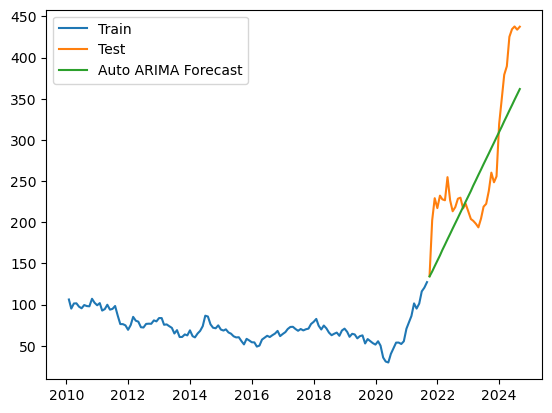

RMSE for Auto ARIMA: 54.52812382626793


In [105]:
from pmdarima import auto_arima

# Fit auto_arima to find the best parameters
model_auto = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the ARIMA model with the best parameters
model_auto.fit(train_data)

# Make predictions
forecast_auto = model_auto.predict(n_periods=len(test_data))
forecast_auto = pd.DataFrame(forecast_auto,index = test_data.index,columns=['Prediction'])

# Plot the results
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast_auto, label='Auto ARIMA Forecast')
plt.legend(loc='best')
plt.show()

# Evaluate the model
rmse_auto = mean_squared_error(test_data, forecast_auto['Prediction'], squared=False)
print(f'RMSE for Auto ARIMA: {rmse_auto}')


In [106]:
# ARIMA(0,2,3)(0,0,0)[0]    ||  AIC=857.220, Time=0.08 sec

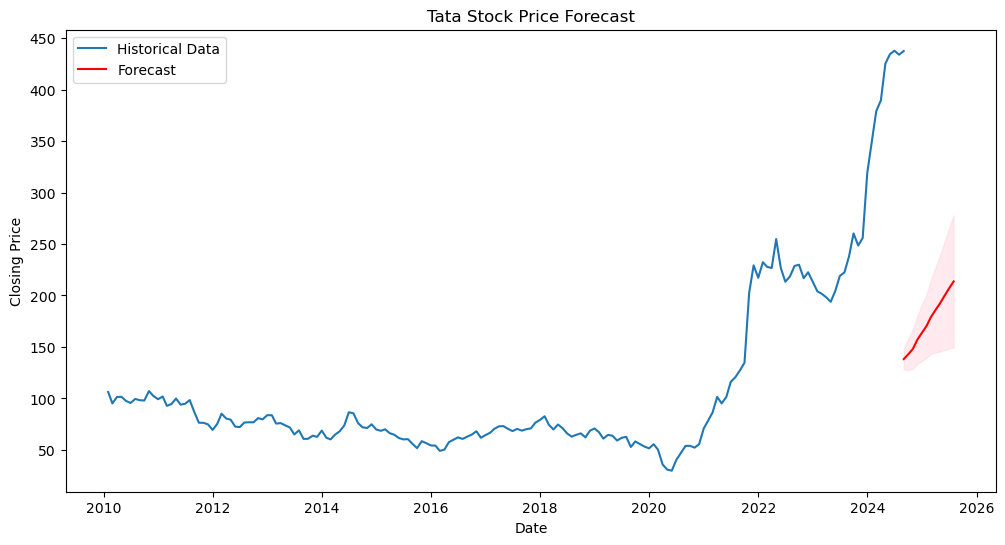

In [107]:
# Plot the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['Close'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Tata Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

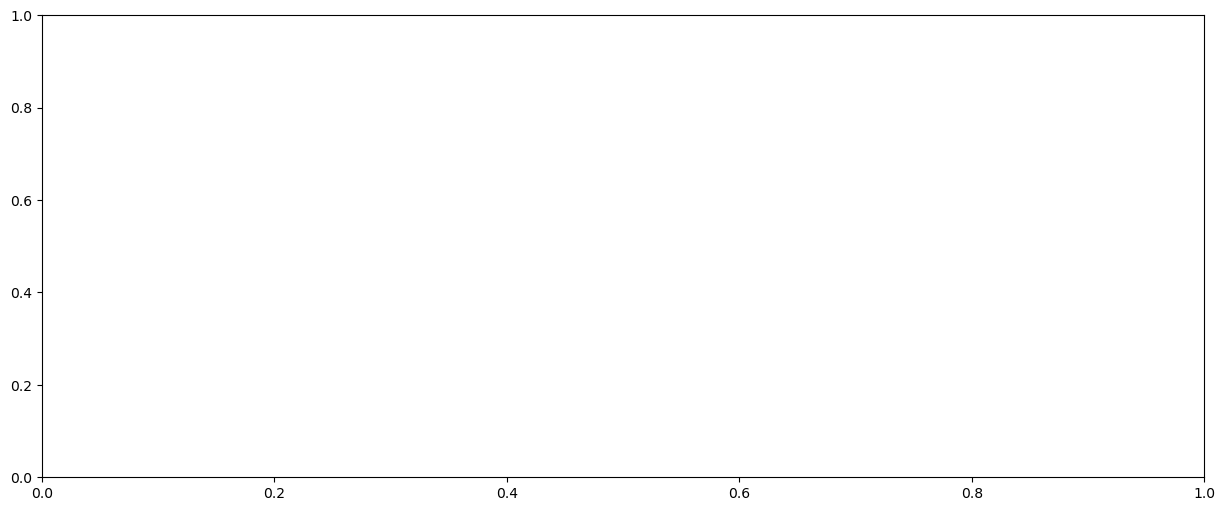

In [108]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 599, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

ax.set_ylim(-35, -18)
plt.show()

In [ ]:
def evaluate_arima_model(X, arima_order):
 # prepare training dataset
 train_size = int(len(X) * 0.80)
 train, test = X[0:train_size], X[train_size:]
 history = [x for x in train]
 predictions = list()
 for t in range(len(test)):
     model = ARIMA(history, order=arima_order)
     model_fit = model.fit()
     yhat = model_fit.forecast()[0]
     predictions.append(yhat)
     history.append(test[t])
 # # calculate out of sample error
 rmse = sqrt(mean_squared_error(test, predictions))
 return rmse,predictions

In [ ]:
import warnings
p_values = range(0,9)
d_values = range(0,3)
q_values = range(0,9)
warnings.filterwarnings("ignore")
predictions_f=evaluate_models(train_data, p_values, d_values, q_values)

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse,predictions = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return predictions
